In [37]:
import numpy as np
from utils import read_envi_ascii, ga_feature_extraction

In [38]:
# Read data
data = read_envi_ascii('data/biaotu.txt')

huangqi = data['huangqi'][:,:40]
zazhi1 = data['zazhi1'][:,:40]
zazhi2 = data['zazhi2'][:,:40]
beijing = data['beijing'][:,:40]
gancaopian = data['gancaopian'][:,:40]
hongqi = data['hongqi'][:,:40]
huangqi_y = np.ones(huangqi.shape[0]) * 3
zazhi1_y = np.ones(zazhi1.shape[0]) * 1
zazhi2_y = np.ones(zazhi2.shape[0]) * 2
beijing_y = np.ones(beijing.shape[0]) * 0
gancaopian_y = np.ones(gancaopian.shape[0]) * 4
hongqi_y = np.ones(hongqi.shape[0]) * 5
data_x = np.concatenate((huangqi, zazhi1, zazhi2, beijing, gancaopian, hongqi), axis=0)
data_y = np.concatenate((huangqi_y, zazhi1_y, zazhi2_y, beijing_y, gancaopian_y, hongqi_y), axis=0)

In [39]:
data_x = np.gradient(data_x, axis=0)

In [40]:
# ga_feature_extraction(data_x, data_y)

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

In [42]:
selector = SelectKBest(score_func=f_regression, k=10)
data_x_selected = selector.fit_transform(data_x, data_y)

# 获取选择的特征列索引
selected_feature_indices = selector.get_support(indices=True)

# 打印选择的特征
print("选择的特征索引:")
print(selected_feature_indices)

选择的特征索引:
[30 31 32 33 34 35 36 37 38 39]


In [43]:
# band 0到39
bands = np.arange(0, 40)
data_x = data_x[:,bands]

In [44]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)

In [45]:
from machine_learning import DecisionTree

file_name = 'models/dt.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name)


预测时间： 0.000997304916381836
DT训练模型评分：1.0
DT待测模型评分：0.3459958932238193
DT预测结果：[2. 1. 0. 3. 4. 3. 3. 1. 2. 5. 3. 3. 1. 1. 3. 5. 4. 4. 4. 3. 2. 1. 1. 4.
 4. 1. 4. 2. 3. 4. 1. 0. 4. 1. 3. 5. 1. 2. 2. 3. 4. 1. 0. 4. 1. 3. 1. 4.
 2. 2. 1. 0. 1. 0. 5. 3. 5. 2. 2. 0. 5. 1. 3. 1. 5. 3. 5. 2. 2. 3. 4. 0.
 1. 2. 3. 0. 2. 2. 1. 2. 4. 0. 5. 0. 5. 0. 4. 2. 5. 5. 3. 3. 4. 0. 5. 1.
 0. 0. 5. 3. 3. 2. 2. 4. 1. 2. 1. 4. 2. 1. 1. 5. 0. 0. 0. 4. 3. 4. 0. 1.
 5. 3. 5. 0. 5. 0. 1. 5. 5. 0. 4. 4. 3. 5. 3. 0. 4. 1. 0. 3. 1. 4. 2. 3.
 3. 2. 5. 4. 5. 1. 4. 4. 5. 1. 4. 4. 2. 3. 0. 0. 5. 4. 2. 4. 1. 0. 5. 1.
 1. 5. 4. 5. 0. 2. 0. 2. 0. 4. 1. 5. 0. 3. 5. 0. 0. 1. 1. 5. 0. 2. 4. 5.
 3. 2. 2. 0. 2. 3. 5. 0. 2. 4. 3. 0. 4. 2. 4. 0. 4. 3. 4. 5. 1. 4. 0. 0.
 4. 1. 1. 3. 2. 4. 5. 3. 0. 4. 4. 0. 4. 4. 3. 2. 1. 1. 3. 0. 0. 5. 5. 2.
 1. 1. 4. 5. 3. 1. 0. 1. 4. 4. 1. 1. 3. 3. 5. 2. 0. 2. 4. 4. 1. 2. 5. 1.
 5. 3. 5. 4. 3. 4. 1. 5. 3. 3. 3. 1. 4. 5. 2. 4. 3. 3. 4. 2. 4. 4. 0. 2.
 5. 0. 0. 0. 3. 1. 2. 0. 2. 2. 2. 1. 2. 2. 5. 0. 

In [46]:
from utils import read_raw
from machine_learning import DecisionTree, predict, svm_classifier, RandomForest
pic = read_raw('data/hebing.raw', shape=(692, 272, 768), setect_bands=bands)
pic_shape0 = pic.shape[0]
pic_shape1 = pic.shape[1]
pic = pic.reshape(-1, len(bands))
pic = np.gradient(pic, axis=0)
pre_pic = predict(pic, file_name)
pre_pic = pre_pic.reshape(pic_shape0, pic_shape1)

预测时间： 0.09674191474914551


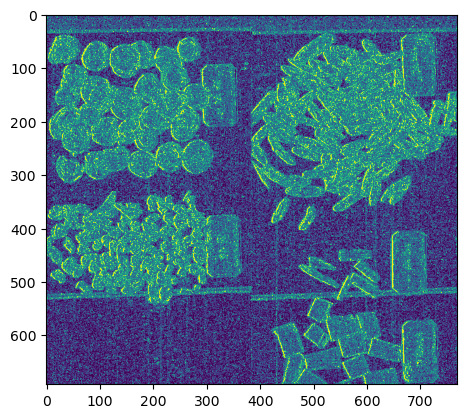

In [47]:
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion, label

pre_pic[pre_pic == 2] = 1
pre_pic[pre_pic == 4] = 1
pre_pic[pre_pic == 5] = 1

plt.imshow(pre_pic)
plt.savefig('pic.png', dpi=300)

In [48]:
blk_size = 4
pre_pic_block = []
block = []
for i in range(0, pre_pic.shape[0], blk_size):
    for j in range(0, pre_pic.shape[1], blk_size):
        pre_pic_block.append(pre_pic[i:i+blk_size, j:j+blk_size])
# 每一块中，如果3的个数大于4，则认为这一块是3，否则按0和1的个数判断
pre_pic_block = np.array(pre_pic_block).reshape(-1, blk_size*blk_size).astype(np.uint8)
for i in range(pre_pic_block.shape[0]):
    if np.sum(pre_pic_block[i] == 3) > 4:
        block.append(3)
    elif np.sum(pre_pic_block[i] == 1) > np.sum(pre_pic_block[i] == 0):
        block.append(1)
    else:
        block.append(0)
pre_pic_block = np.array(block).reshape(pre_pic.shape[0]//blk_size, pre_pic.shape[1]//blk_size)
pre_pic_block = np.repeat(pre_pic_block, blk_size, axis=0)
pre_pic_block = np.repeat(pre_pic_block, blk_size, axis=1)
pre_pic = pre_pic_block

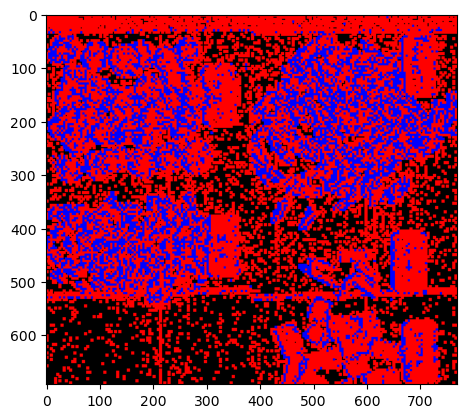

In [49]:




# 定义8领域结构元素
structure_element = np.ones((3, 3), dtype=np.uint8)


# 对使用1类进行腐蚀



mask_3 = pre_pic == 3

pre_pic[binary_dilation(mask_3, structure=structure_element, iterations=1)] = 3

mask_1 = pre_pic == 1
pre_pic[binary_dilation(mask_1, structure=structure_element ,iterations=1)] = 1




pre_pic_colored = np.zeros((pre_pic.shape[0], pre_pic.shape[1], 3), dtype=np.uint8)

pre_pic_colored[pre_pic == 0] = [0, 0, 0]
pre_pic_colored[pre_pic == 1] = [255, 0, 0]
pre_pic_colored[pre_pic == 2] = [0, 255, 0]
pre_pic_colored[pre_pic == 3] = [0, 0, 255]
pre_pic_colored[pre_pic == 4] = [255, 255, 0]
pre_pic_colored[pre_pic == 5] = [255, 0, 255]

plt.imshow(pre_pic_colored)
plt.savefig('bands_s.png', dpi=300)